# Observation of Medical Cost Personal Dataset

In this project insurance.csv file will be inspected with Python.The goal with this project will be to analyze various attributes within insurance.csv to learn more about the patient information in the file and gain insight into potential use cases for the dataset.

For the first lets observe csv file


In [72]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [73]:
df = pd.read_csv('insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [74]:
print(df.describe())


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Get a view of our Dataset with varied plots:

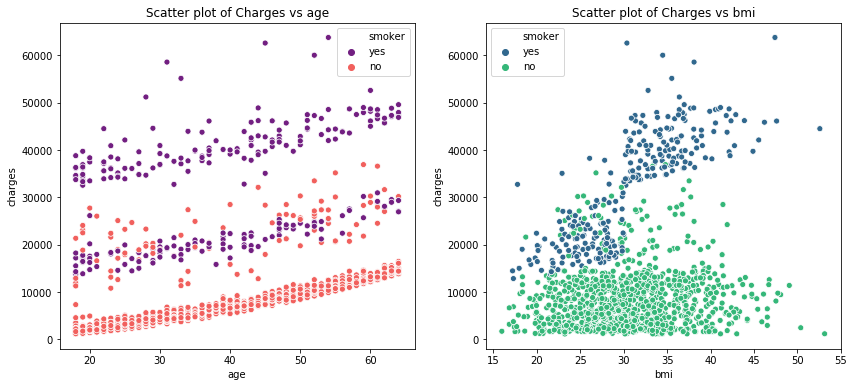

In [75]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

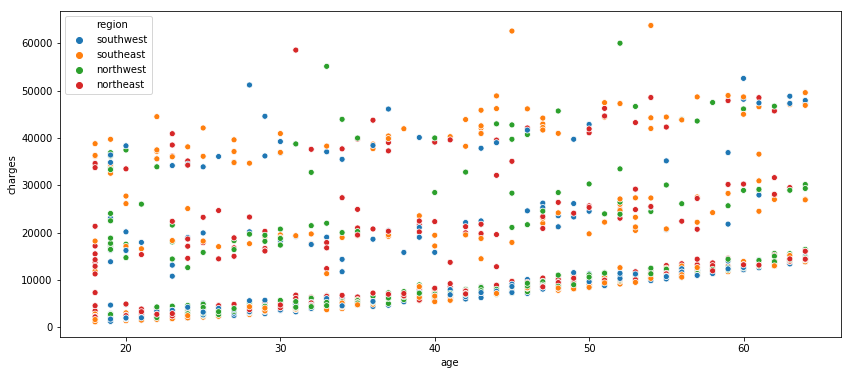

In [76]:
f = plt.figure(figsize= (14,6))
sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'region')

/Users/igorzheltukhin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


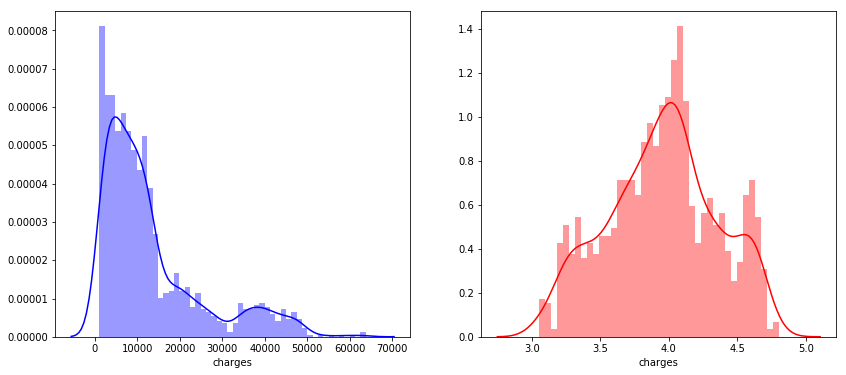

In [77]:
f = plt.figure(figsize= (14,6))
ax = f.add_subplot(121)
sns.distplot(df['charges'],bins = 50, color = 'b', ax =ax)

ax = f.add_subplot(122)
sns.distplot(np.log10(df['charges']), bins = 40, color = 'r', ax=ax)

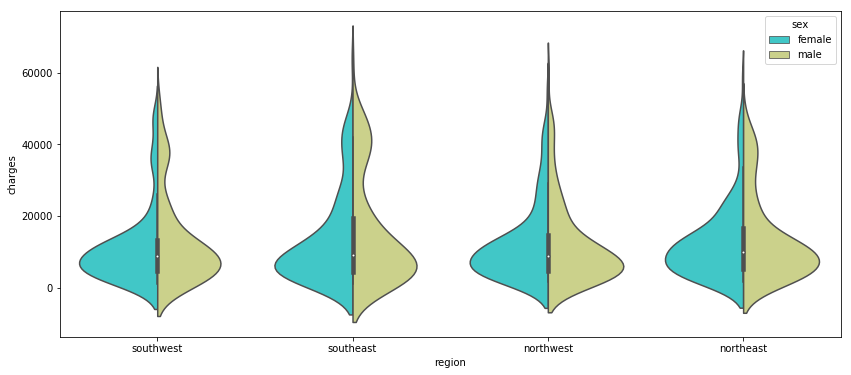

In [78]:
f = plt.figure(figsize= (14,6)) 
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='rainbow',split=True)


Text(0.5, 1.0, 'Box plot of charges vs children')

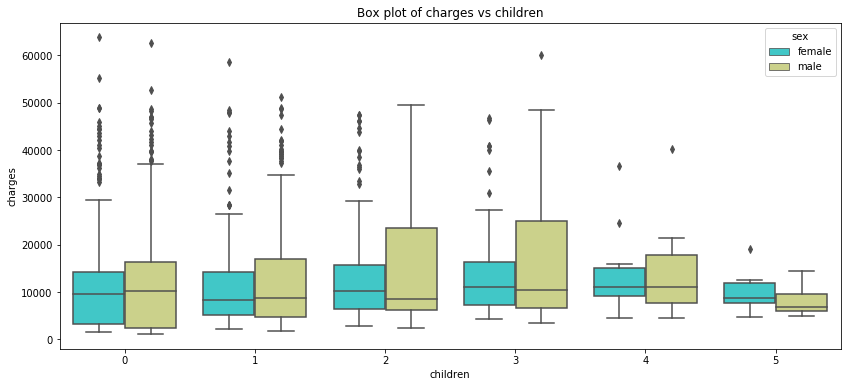

In [79]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children')

# Encoding
     
Machine learning algoritms can't work with categorical data so we must convert data to numerical. We will use pandas function get_dummies with a parameter drop_first = True to avoid Dummy variable trap.


In [80]:
categorical_data = ['sex', 'region', 'smoker', 'children']
df_encode = pd.get_dummies(data = df , prefix = 'WIN', prefix_sep = ':', columns = categorical_data, drop_first = True, dtype = 'int8')
print(df_encode.head())

   age     bmi      charges  WIN:male  WIN:northwest  WIN:southeast  \
0   19  27.900  16884.92400         0              0              0   
1   18  33.770   1725.55230         1              0              1   
2   28  33.000   4449.46200         1              0              1   
3   33  22.705  21984.47061         1              1              0   
4   32  28.880   3866.85520         1              1              0   

   WIN:southwest  WIN:yes  WIN:1  WIN:2  WIN:3  WIN:4  WIN:5  
0              1        1      0      0      0      0      0  
1              0        0      1      0      0      0      0  
2              0        0      0      0      1      0      0  
3              0        0      0      0      0      0      0  
4              0        0      0      0      0      0      0  


In [101]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)

ci,lam

df_encode['charges'] = np.log(df_encode['charges'])

# Train test split 


In [102]:
from sklearn.model_selection import train_test_split 
X = df_encode.drop('charges', axis = 1)
y = df_encode['charges']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)



# Model building

In this step build model using our linear regression equation  𝜃=(𝐗𝐓𝐗)−1𝐗𝐓𝐲 . In first step we need to add a feature  𝐱0=1  to our original data set.

In [103]:
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train] #добавляем Х0 = 1 к нашей модели 
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

In [104]:
theta = np.matmul(np.linalg.inv(np.matmul(X_train_0.T, X_train_0)), np.matmul(X_train_0.T, y_train))

In [105]:
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [106]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.059171,7.059171
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013517,0.013517
3,theta_3,WIN:male,-0.067767,-0.067767
4,theta_4,WIN:northwest,-0.055845,-0.055845
5,theta_5,WIN:southeast,-0.146578,-0.146578
6,theta_6,WIN:southwest,-0.133508,-0.133508
7,theta_7,WIN:yes,1.550481,1.550481
8,theta_8,WIN:1,0.149457,0.149457
9,theta_9,WIN:2,0.272919,0.272919


# Model evaluation
We will predict value for target variable by using our model parameter for test data set. Then compare the predicted value with actual valu in test set. We compute Mean Square Error using formula
𝐉(𝜃)=1𝐦∑𝐢=1𝐦(𝐲̂ 𝐢−𝐲𝐢)2
 
𝐑2  is statistical measure of how close data are to the fitted regression line.  𝐑2  is always between 0 to 100%. 0% indicated that model explains none of the variability of the response data around it's mean. 100% indicated that model explains all the variablity of the response data around the mean.

𝐑2=1−𝐒𝐒𝐄/𝐒𝐒𝐓
 
SSE = Sum of Square Error
SST = Sum of Square Total
𝐒𝐒𝐄=∑𝐢=1𝐦(𝐲̂ 𝐢−𝐲𝐢)2
 
𝐒𝐒𝐓=∑𝐢=1𝐦(𝐲𝐢−𝐲¯𝐢)2
 
Here  𝐲̂   is predicted value and  𝐲¯  is mean value of  𝐲 .



In [107]:
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.1872962232298192
R square obtain for normal equation method is : 0.7795687545055316


In [108]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.18729622322981898
R square obtain for scikit learn library is : 0.7795687545055318


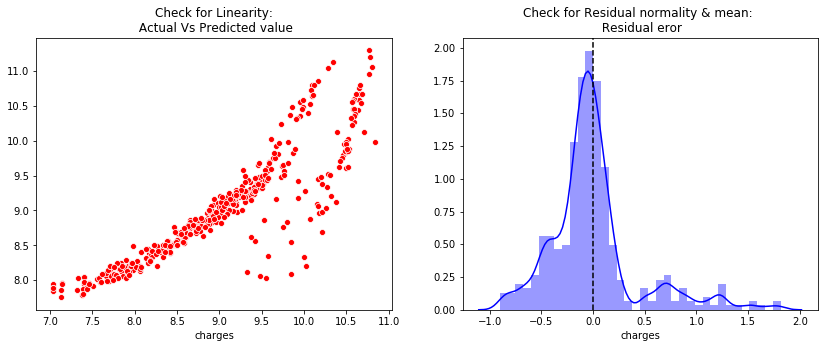

In [116]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk, ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

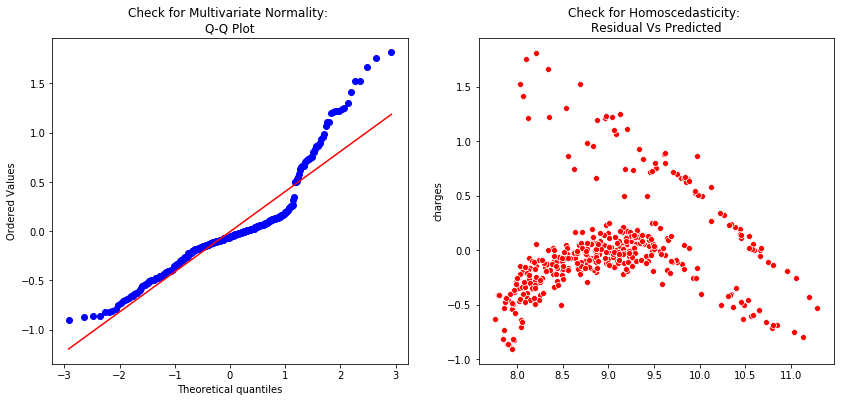

In [118]:

# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');